### problem 1.4

Воспользуемся центральной предельной теоремой. Выборочное среднее при большин $n$ хорошо похоже на
нормальное распределение, $EX = \mu$ $\text{Var}(X) = \sigma^2$. Имеем из свойства нормального распределения $\overline{X} \sim N(\mu; \sigma^2/n) \Longrightarrow \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \sim N(0; 1)$

$P\left(|\overline{X} - \mu| \leq \epsilon\right) = P\left(\normalsize -\epsilon \leq \overline{X} - \mu \leq \epsilon\right) = P\left(\frac{-\epsilon}{\sigma/\sqrt{n}} \leq \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \leq \frac{\epsilon}{\sigma/\sqrt{n}}\right) = F\left(\frac{\epsilon}{\sigma/\sqrt{n}}\right) - F\left(-\frac{\epsilon}{\sigma/\sqrt{n}}\right) = 2F\left(\frac{\epsilon\sqrt{n}}{\sigma}\right) - 1 \geq 0.95$


$F\left(\frac{\epsilon\sqrt{n}}{\sigma}\right) \geq \frac{1 + 0.95}{2} \Longrightarrow \frac{\epsilon\sqrt{n}}{\sigma} \geq q$, $q$ - квантиль стандартного нормального распределения уровня $\frac{1 + 0.95}{2} = 0.975 \Longrightarrow q = 1.96$ (по таблице).

$n \large \geq \frac{q^2 \cdot \sigma^2}{\epsilon^2} = \frac{1.96^2 \cdot \sigma^2}{0.01^2}$

тк $\text{Var}(X) = \frac{(b - a)^2}{12}$, то дисперсия максимальна при $\theta = 10$ $\text{Var}(X) = \frac{\theta ^2}{12}$

$n \geq \frac{1.96^2 \cdot 100}{0.01^2 \cdot 12} = 320133.33333333326 \Longrightarrow n = 320134$

In [7]:
import numpy as np


n = 320134
a = np.random.uniform(low = 0, high = 6, size = (500, n))
meanArray = np.mean(a, axis = 1)
ex = 3
count = meanArray[abs(meanArray - ex) > 0.01]
print("Из {n} выборок растояние выборочного среднего и мат ожидание превысил {eps} {count} раз".format(n = 500, eps = 0.01, count = len(count)))

Из 500 выборок растояние выборочного среднего и мат ожидание превысил 0.01 1 раз


### problem 2.4

In [9]:
import pandas as pd

In [10]:
path = "/Users/mihildrozdov/Downloads/mobile_phones.csv"
table = pd.read_csv(path)
table.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
"""Две симкарты"""
count = sum(table["dual_sim"] == 1)
print("Две симкарты имееют {count} моделей".format(count = count))

Две симкарты имееют 1019 моделей


In [12]:
"""3G"""
count = sum(table["three_g"] == 1)
print("3G поддерживает {count} моделей".format(count = count))

3G поддерживает 1523 моделей


In [13]:
"""Наибольшее количество ядер"""
result = max(table["n_cores"])
print("Наибольшее количество ядер = {count}".format(count = result))

Наибольшее количество ядер = 8


In [14]:
info = (table[table["wifi"] == 1])["battery_power"]
sampleMean = round(info.mean(), 3)
sampleVar = round(info.var(ddof = 1), 3)
sampleMed = round(info.median(), 3)
sampleQuantile = round(info.quantile(q = 2 / 5), 3)
print("Выборочное среднее = {flag1}\nВыборочная дисперсия = {flag2}\nВыборочная медиана = {flag3}\nВыборочная квантиль порядка 2/5 = {flag4}".format(flag1 = sampleMean, flag2 = sampleVar, flag3 = sampleMed, flag4 = sampleQuantile))

Выборочное среднее = 1234.904
Выборочная дисперсия = 190296.401
Выборочная медиана = 1233.0
Выборочная квантиль порядка 2/5 = 1077.8


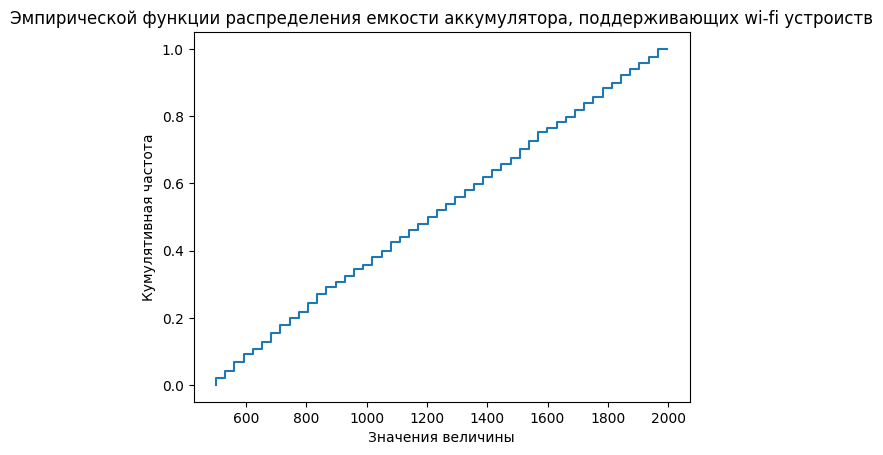

In [17]:
"""График эмпирической функции распределения поддерживающих wi-fi устроиств"""
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


ecdf = sm.distributions.ECDF(info)
x = np.linspace(min(info), max(info))
plt.step(x, ecdf(x))
plt.xlabel("Значения величины")
plt.ylabel("Кумулятивная частота")
plt.title("Эмпирической функции распределения емкости аккумулятора, поддерживающих wi-fi устроиств")
plt.show()

array([[<Axes: title={'center': 'battery_power'}>]], dtype=object)

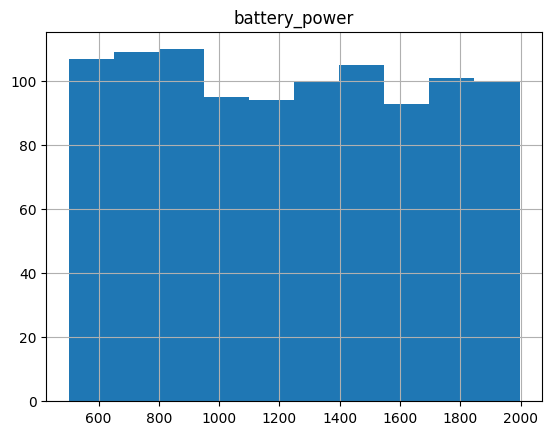

In [18]:
"""Гистограмма устроиств поддерживающих wi-fi"""
((table[table["wifi"] == 1])[["battery_power"]]).hist()

<Axes: >

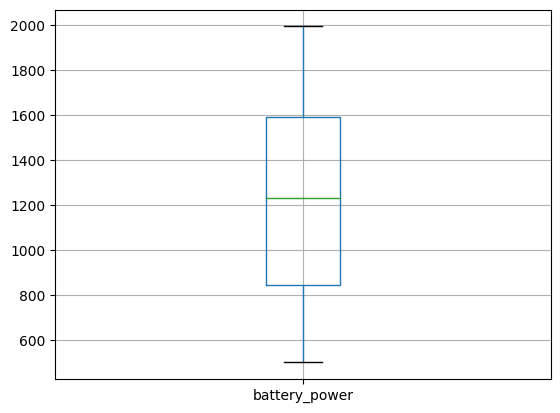

In [19]:
"""Боксплот поддерживающих wi-fi"""
((table[table["wifi"] == 1])[["battery_power"]]).boxplot()

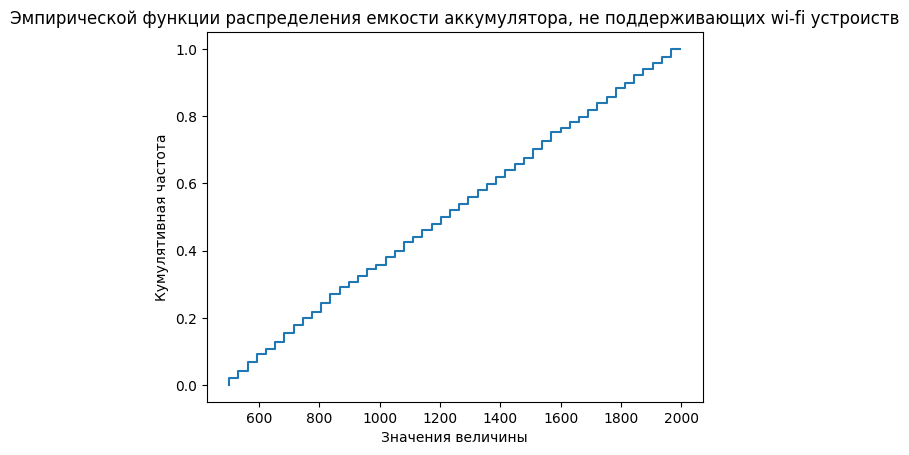

In [21]:
"""График эмпирической функции распределения не поддерживающих wi-fi устроиств"""

ecdf = sm.distributions.ECDF(info)
x = np.linspace(min(info), max(info))
plt.step(x, ecdf(x))
plt.xlabel("Значения величины")
plt.ylabel("Кумулятивная частота")
plt.title("Эмпирической функции распределения емкости аккумулятора, не поддерживающих wi-fi устроиств")
plt.show()

array([[<Axes: title={'center': 'battery_power'}>]], dtype=object)

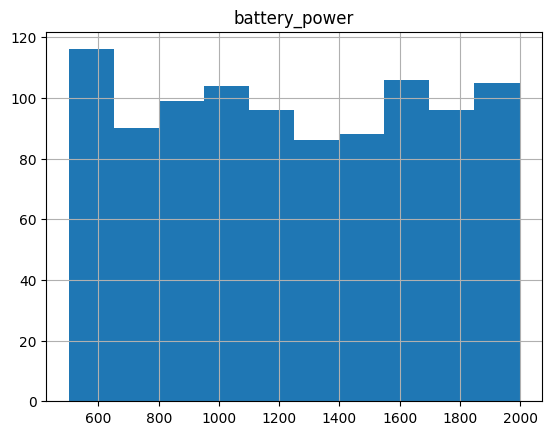

In [22]:
"""Гистограмма устроиств не поддерживающих wi-fi"""
((table[table["wifi"] == 0])[["battery_power"]]).hist()

<Axes: >

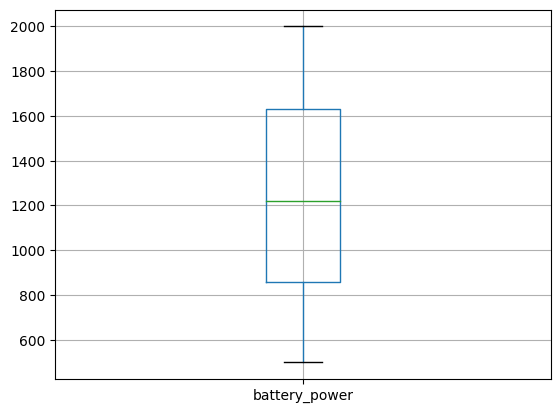

In [23]:
"""Боксплот не поддерживающих wi-fi"""
((table[table["wifi"] == 0])[["battery_power"]]).boxplot()

In [24]:
allInfo = table["battery_power"]
sampleMean = round(allInfo.mean(), 3)
sampleVar = round(allInfo.var(ddof = 1), 3)
sampleMed = round(allInfo.median(), 3)
sampleQuantile = round(allInfo.quantile(q = 2 / 5), 3)
print("Выборочное среднее = {flag1}\nВыборочная дисперсия = {flag2}\nВыборочная медиана = {flag3}\nВыборочная квантиль порядка 2/5 = {flag4}".format(flag1 = sampleMean, flag2 = sampleVar, flag3 = sampleMed, flag4 = sampleQuantile))

Выборочное среднее = 1238.518
Выборочная дисперсия = 193088.36
Выборочная медиана = 1226.0
Выборочная квантиль порядка 2/5 = 1076.0


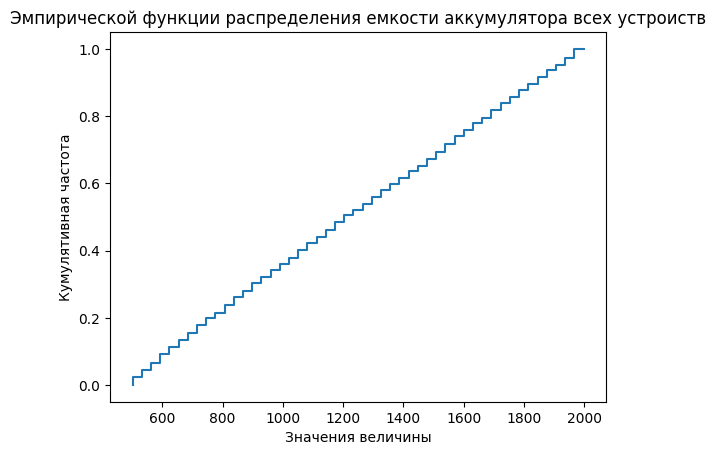

In [25]:
"""График эмпирической функции распределения для всех устроиств"""
ecdf = sm.distributions.ECDF(allInfo)

x = np.linspace(min(allInfo), max(allInfo))
plt.step(x, ecdf(x))
plt.xlabel("Значения величины")
plt.ylabel("Кумулятивная частота")
plt.title("Эмпирической функции распределения емкости аккумулятора всех устроиств")
plt.show()

array([[<Axes: title={'center': 'battery_power'}>]], dtype=object)

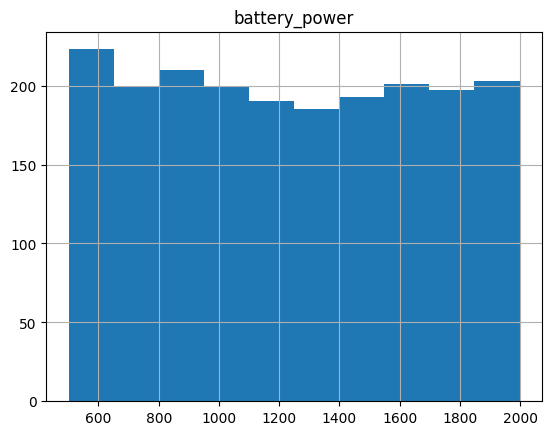

In [26]:
"""Гистограмма всех телефонов"""
(table[["battery_power"]]).hist()

<Axes: >

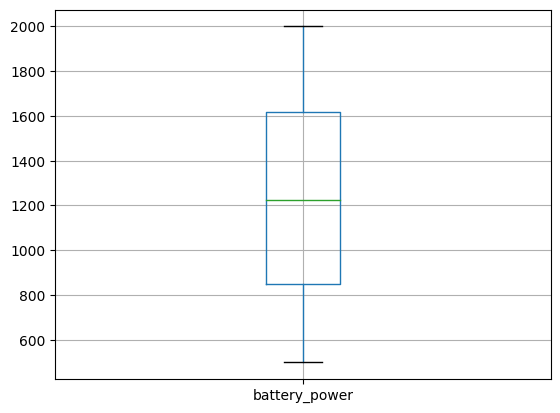

In [27]:
"""боксплот всех телефонов"""
(table[["battery_power"]]).boxplot()